In [2]:
'''
Linear Regretion
0) Prepare data
1) Design Model (input, output, forward pass)
2) Construct loss and optimizer
3) Training loop
    - Forward pass: compute prediction
    - Backward pass: gradients
    - Update weights and empty gradients
'''
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Prep data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# turn y into comlun vector
y = y.view(y.shape[0],1) # [num_items, 1]

n_samples, n_features = X.shape
print(f'n_samples: {n_samples}; n_features: {n_features}')

n_samples: 100; n_features: 1


In [4]:
# Design Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [5]:
# Construct loss & Optimizer
learning_rate = 0.01
criterion = nn.MSELoss() # Mean Square 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
# Training Loop
n = 100
for epoch in range(n):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    # backward pass
    loss.backward()
    # update wieghts
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4344.4419
epoch: 20, loss = 3243.0918
epoch: 30, loss = 2445.9199
epoch: 40, loss = 1868.3154
epoch: 50, loss = 1449.3994
epoch: 60, loss = 1145.3032
epoch: 70, loss = 924.3750
epoch: 80, loss = 763.7479
epoch: 90, loss = 646.8817
epoch: 100, loss = 561.7996


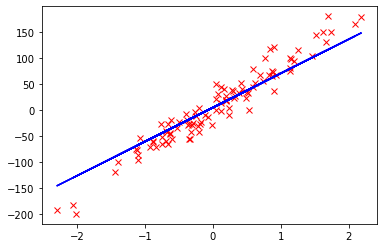

In [8]:
# Plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'rx')
plt.plot(X_numpy, predicted, 'b')
plt.show()